<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Proyecto final </font>**
### **<font color="DodgerBlue"> Equipo: Planetitas </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

### **<font color="ForestGreen"> Modelación de atmósferas planetarias </font>**

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [7]:
filename1='SO-0.45-Ts-3500.nc'
filename2='SC-0.45-Ts-3500.nc'

ds1=xr.open_dataset(filename1)
ds2=xr.open_dataset(filename2)
va1 = ds1['va'] #northward_wind, positiva va al norte
ua1 = ds1['ua'] #eastward_wind, positiva va al este
ts1 = ds1['ts'] #surface_temperature
spd1 = ds1['spd'] #wind_speed
va2 = ds2['va'] #northward_wind
ua2 = ds2['ua'] #eastward_wind
ts2 = ds2['ts'] #surface_temperature
spd2 = ds2['spd'] #wind_speed

### Índice lev
- Datos de 0.01 a 0.99
- Eje Z
- Representa sigma en los puntos medios de las capas atmosféricas. Estas coordenadas tiene una tendencia vertical que normaliza la presión atmosférica respecto a la presión de la superficie y la presión del respectivo nivel de la atmósfera.
- Útil para representaciones topográficas

### Índice levp
- Datos de 0 a 1
- Eje Z
- Representa valores de sigma en las interfaces de las capas atmosféricas, es decir, estos valores están definidos en los límites entre las distintas capas de la atmósfera en lugar de en los puntos medios.

In [8]:
#Primero haremos las gráficas meridionales de SO
#Vamos a seleccionar niveles altos, medios y bajos
bajo=va1.sel(lev=slice(0, 0.25))
medio=va1.sel(lev=slice(0.26, 0.6))
alto=va1.sel(lev=slice(0.61, 1))
#print(bajo, medio, alto)

In [9]:
#Se promedia entre el tiempo y los niveles para graficarlos
prom_bajo= bajo.mean(['time', 'lev'])
prom_medio= medio.mean(['time', 'lev'])
prom_alto= alto.mean(['time', 'lev'])

#Hacemos un vector de lat y lon, son el mismo para cada nivel
lats=va1.lat
lons=va1.lon

In [10]:
#quitamos la línea blanca
from cartopy.util import add_cyclic_point 
data_b, lon = add_cyclic_point(prom_bajo, coord=lons)
data_m, lon = add_cyclic_point(prom_medio, coord=lons)
data_a, lon = add_cyclic_point(prom_alto, coord=lons)

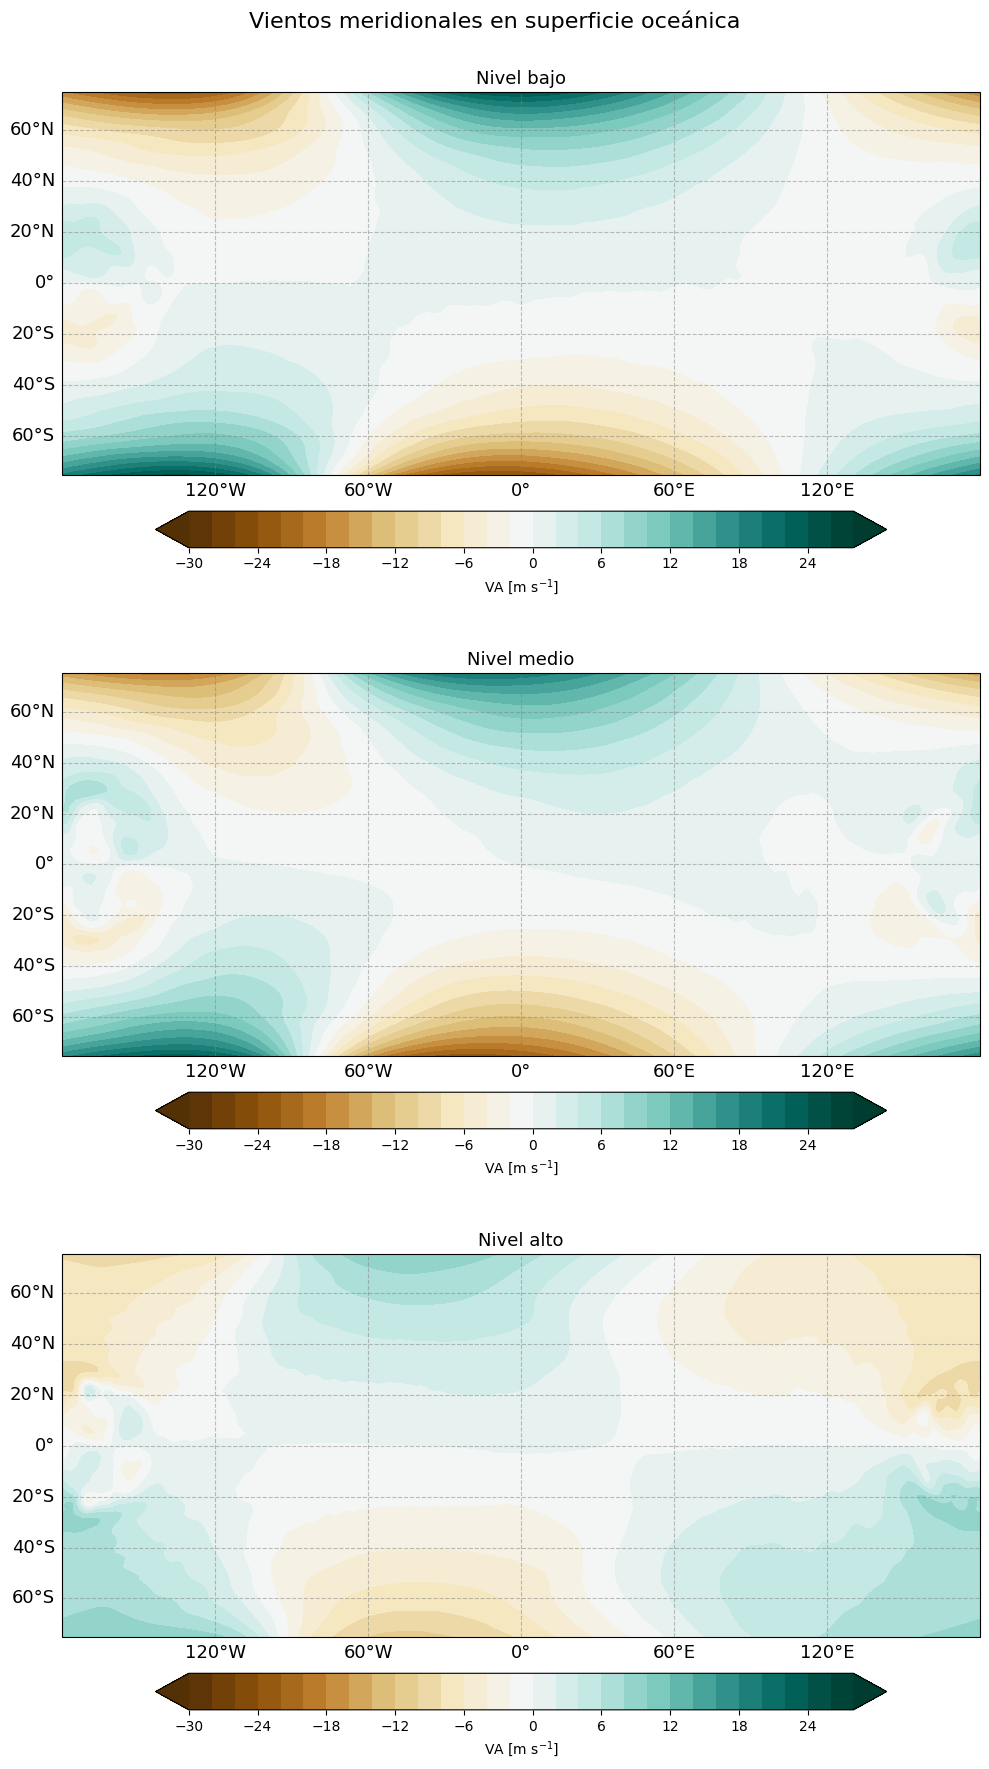

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': ccrs.PlateCarree()})

fig.suptitle('Vientos meridionales en superficie oceánica', fontsize=16)

ax = axs[0]
cs = ax.contourf(lon, lats, data_b, levels=np.arange(-30, 30, 2), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel bajo', fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('VA [m s$^{-1}$]')

ax = axs[1]
cs = ax.contourf(lon, lats, data_m, levels=np.arange(-30, 30, 2), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel medio', fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('VA [m s$^{-1}$]')

ax = axs[2]
cs = ax.contourf(lon, lats, data_a, levels=np.arange(-30, 30, 2), cmap='BrBG', extend='both', transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel alto', fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('VA [m s$^{-1}$]')

plt.tight_layout()
fig.savefig('Vientos_meridionales_SO.png')
plt.show()

In [12]:
#Ahora haremos las gráficas meridionales de SC
#Vamos a seleccionar niveles altos, medios y bajos
bajosc=va2.sel(lev=slice(0, 0.25))
mediosc=va2.sel(lev=slice(0.26, 0.6))
altosc=va2.sel(lev=slice(0.61, 1))
#print(bajo, medio, alto)

In [13]:
#Se promedia entre el tiempo y los niveles para graficarlos
prom_bajosc= bajosc.mean(['time', 'lev'])
prom_mediosc= mediosc.mean(['time', 'lev'])
prom_altosc= altosc.mean(['time', 'lev'])

#Hacemos un vector de lat y lon, son el mismo para cada nivel
lats=va2.lat
lons=va2.lon

In [14]:
#quitamos la línea blanca
data_bsc, lon = add_cyclic_point(prom_bajosc, coord=lons)
data_msc, lon = add_cyclic_point(prom_mediosc, coord=lons)
data_asc, lon = add_cyclic_point(prom_altosc, coord=lons)

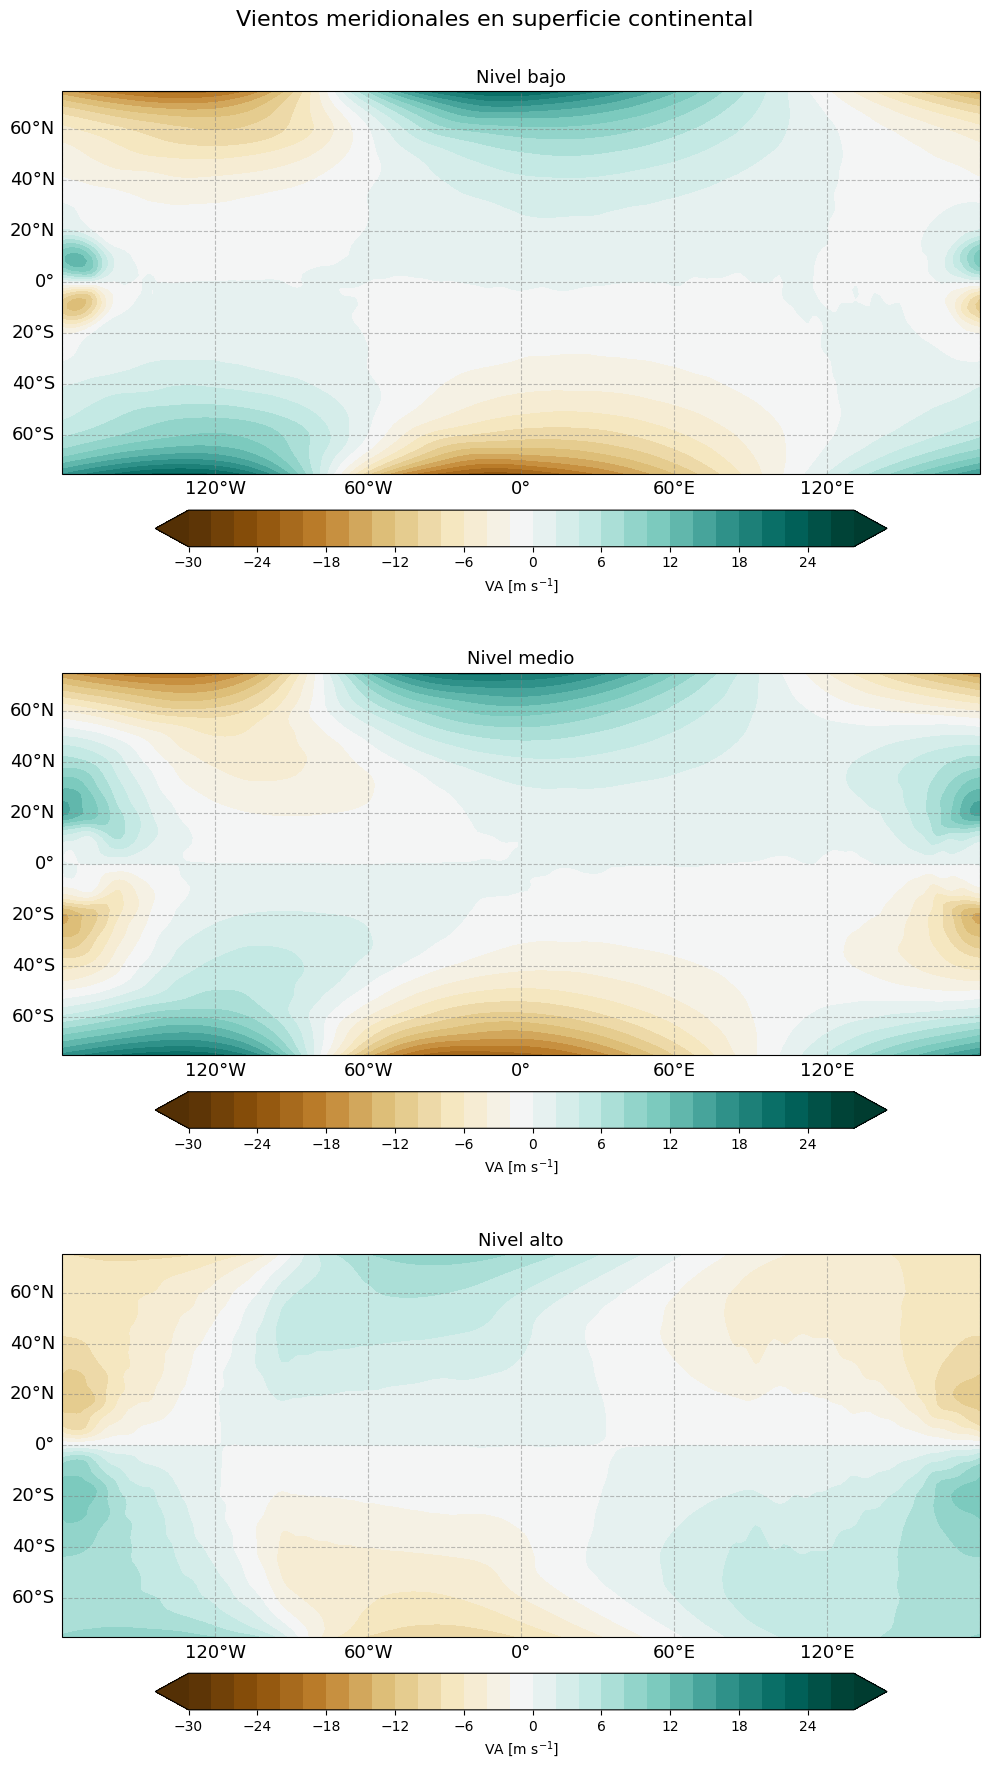

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': ccrs.PlateCarree()})

fig.suptitle('Vientos meridionales en superficie continental', fontsize=16)

ax = axs[0]
cs=ax.contourf(lon,lats,data_bsc,levels = np.arange(-30, 30, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) 
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel bajo',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('VA [m s$^{-1}$]')

ax = axs[1]
cs=ax.contourf(lon,lats,data_msc,levels = np.arange(-30, 30, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel medio',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('VA [m s$^{-1}$]')

ax = axs[2]
cs=ax.contourf(lon,lats,data_asc,levels = np.arange(-30, 30, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel alto',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('VA [m s$^{-1}$]')

plt.tight_layout()
fig.savefig('Vientos_meridionales_SC.png')
plt.show()

In [16]:
#Por consiguiente, haremos las gráficas de vientos zonales para SO
#Vamos a seleccionar niveles altos, medios y bajos
bajo_SOE=ua1.sel(lev=slice(0, 0.25))
medio_SOE=ua1.sel(lev=slice(0.26, 0.6))
alto_SOE=ua1.sel(lev=slice(0.61, 1))
#print(bajo, medio, alto)

In [17]:
#Se promedia entre el tiempo y los niveles para graficarlos
prom_bajo_SOE= bajo_SOE.mean(['time', 'lev'])
prom_medio_SOE= medio_SOE.mean(['time', 'lev'])
prom_alto_SOE= alto_SOE.mean(['time', 'lev'])

#Hacemos un vector de lat y lon, son el mismo para cada nivel
lats_SOE=ua1.lat
lons_SOE=ua1.lon

In [18]:
#quitamos la línea blanca
data_b_SOE, lon = add_cyclic_point(prom_bajo_SOE, coord=lons_SOE)
data_m_SOE, lon = add_cyclic_point(prom_medio_SOE, coord=lons_SOE)
data_a_SOE, lon = add_cyclic_point(prom_alto_SOE, coord=lons_SOE)

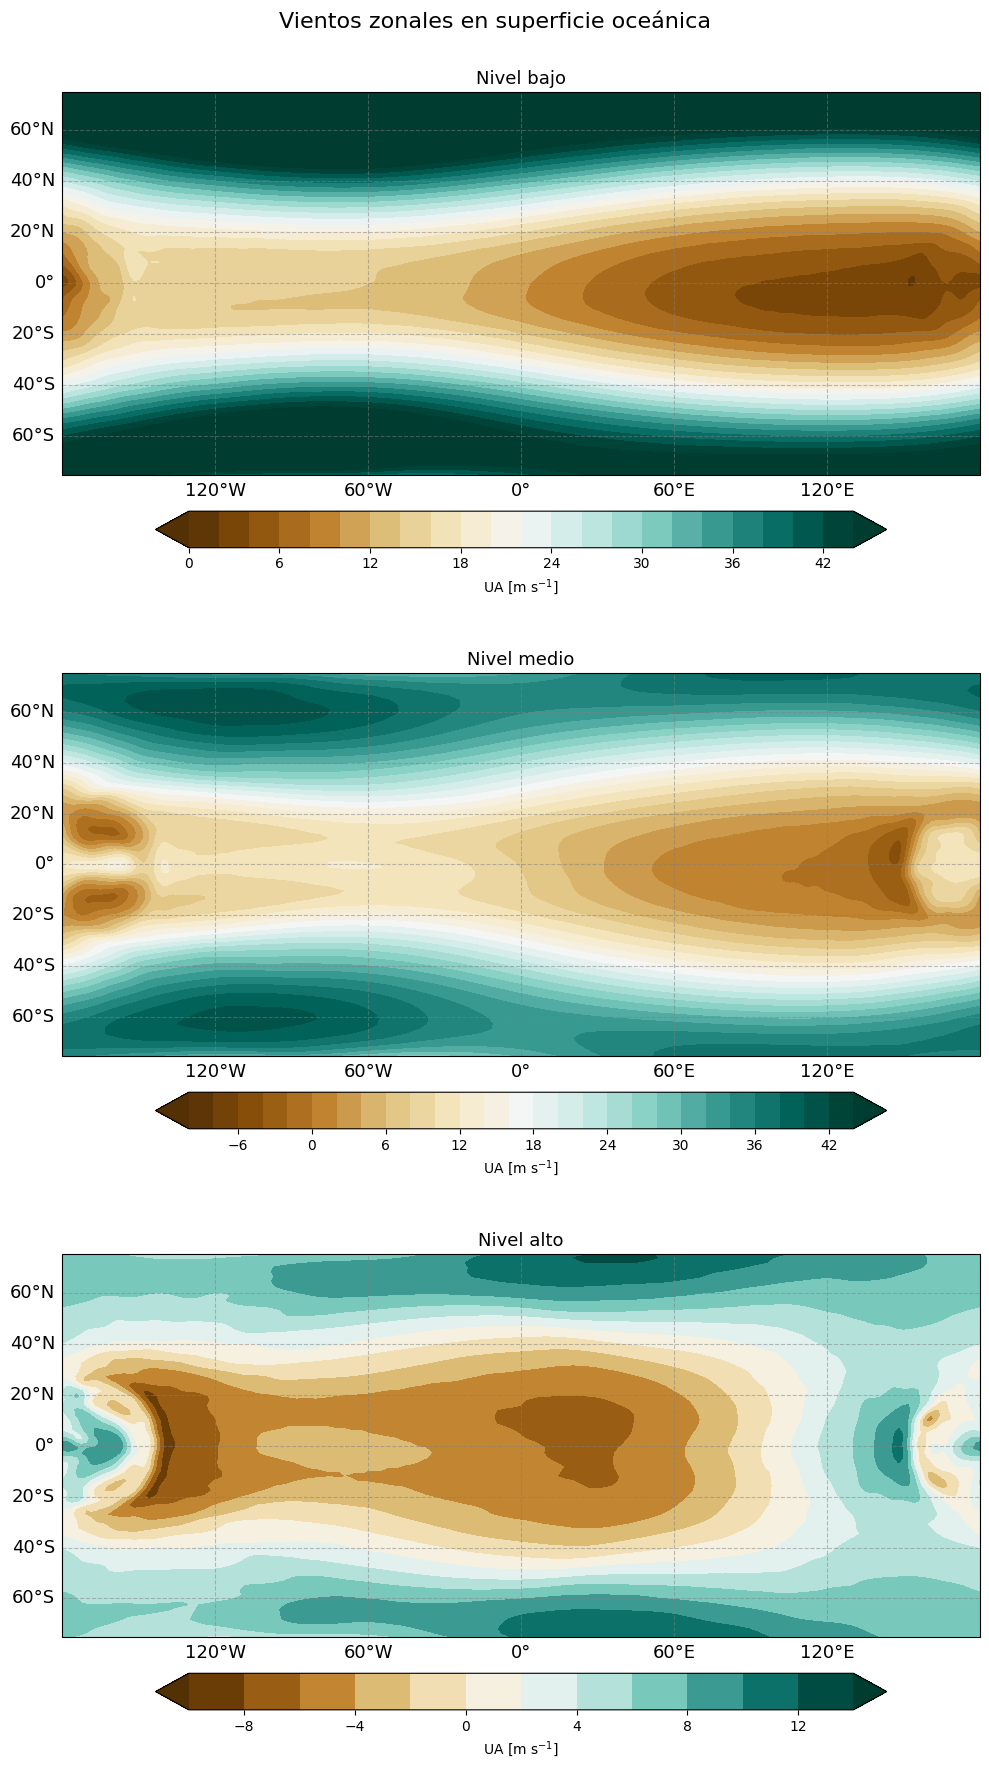

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': ccrs.PlateCarree()})

fig.suptitle('Vientos zonales en superficie oceánica', fontsize=16)

ax = axs[0]
cs=ax.contourf(lon,lats_SOE,data_b_SOE, levels = np.arange(0, 45, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel bajo',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('UA [m s$^{-1}$]')

ax = axs[1]
cs=ax.contourf(lon,lats_SOE,data_m_SOE,levels = np.arange(-10, 45, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel medio',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('UA [m s$^{-1}$]')

ax = axs[2]
cs=ax.contourf(lon,lats_SOE,data_a_SOE,levels = np.arange(-10, 15, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel alto',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('UA [m s$^{-1}$]')

plt.tight_layout()
fig.savefig('Vientos_zonales_SO.png')
plt.show()

In [20]:
#Finalmente, haremos los vientos zonales para SC
#Vamos a seleccionar niveles altos, medios y bajos
bajos_SCE=ua2.sel(lev=slice(0, 0.25))
medios_SCE=ua2.sel(lev=slice(0.26, 0.6))
altos_SCE=ua2.sel(lev=slice(0.61, 1))
#print(bajo, medio, alto)

In [21]:
#Se promedia entre el tiempo y los niveles para graficarlos
prom_bajos_SCE= bajos_SCE.mean(['time', 'lev'])
prom_medios_SCE= medios_SCE.mean(['time', 'lev'])
prom_altos_SCE= altos_SCE.mean(['time', 'lev'])

#Hacemos un vector de lat y lon, son el mismo para cada nivel
lats_SCE=ua2.lat
lons_SCE=ua2.lon

In [22]:
#quitamos la línea blanca
data_bsce, lon = add_cyclic_point(prom_bajos_SCE, coord=lons_SCE)
data_msce, lon = add_cyclic_point(prom_medios_SCE, coord=lons_SCE)
data_asce, lon = add_cyclic_point(prom_altos_SCE, coord=lons_SCE)

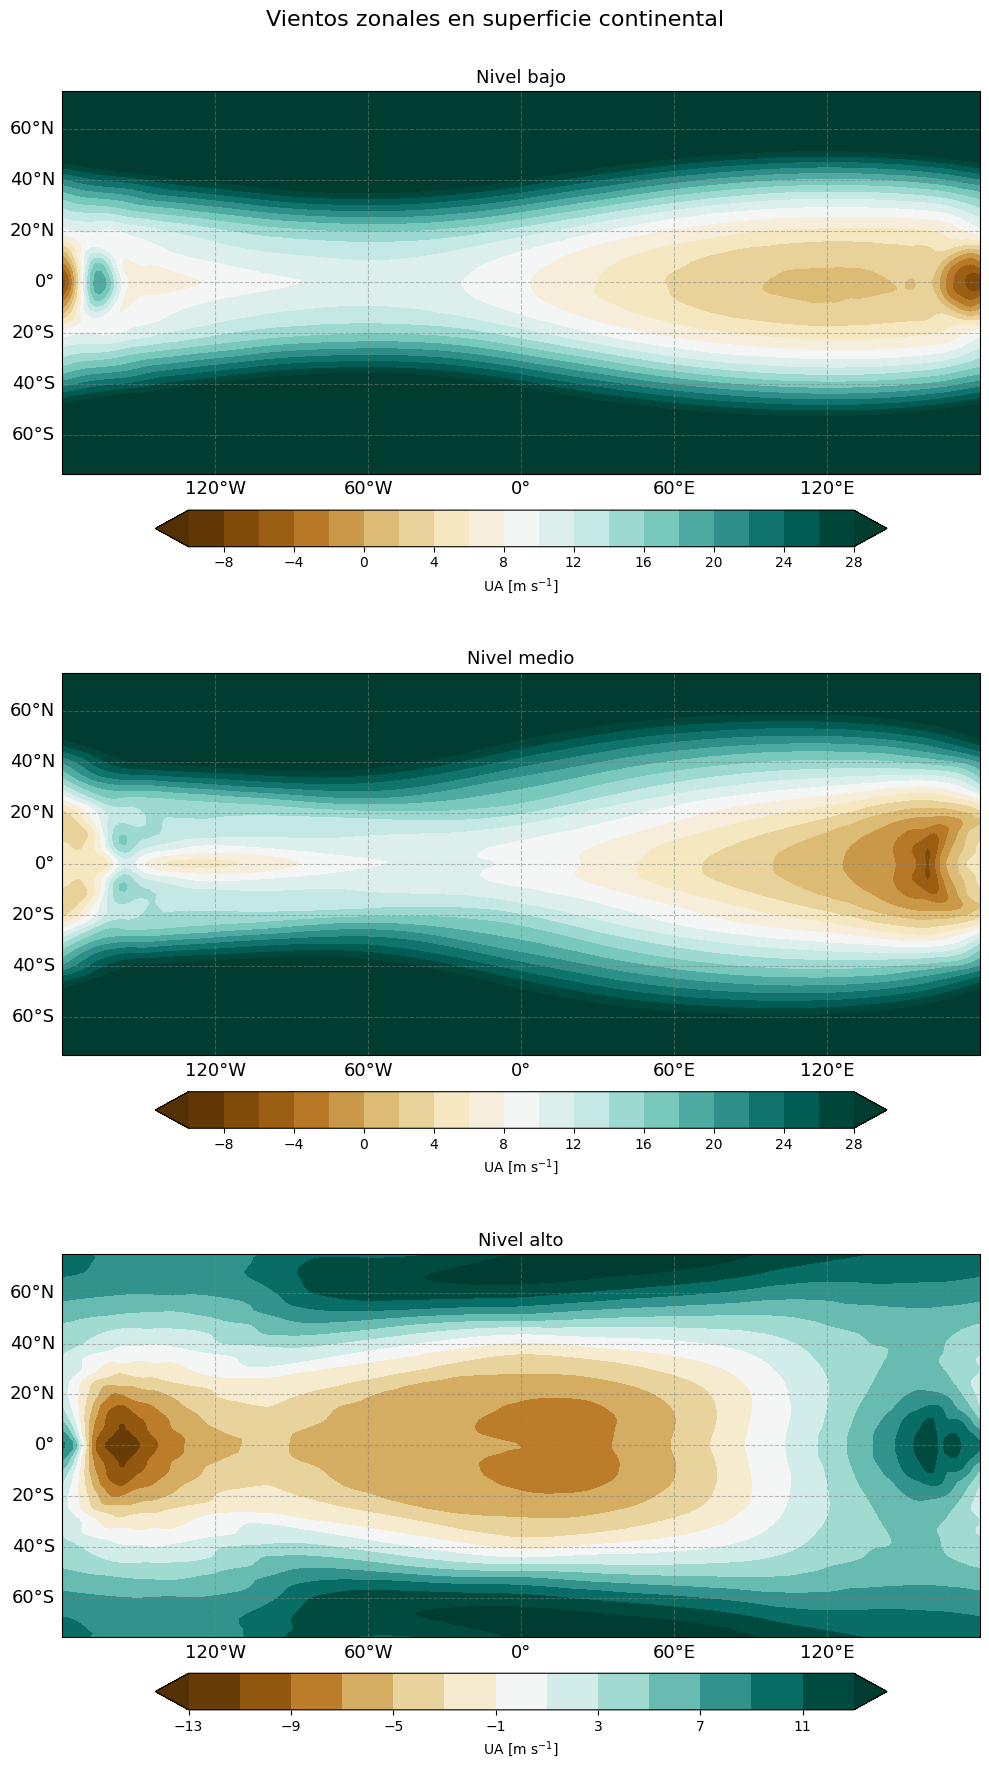

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': ccrs.PlateCarree()})

fig.suptitle('Vientos zonales en superficie continental', fontsize=16)

ax = axs[0]
cs=ax.contourf(lon,lats_SCE,data_bsce, levels = np.arange(-10, 30, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel bajo',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('UA [m s$^{-1}$]')

ax = axs[1]
cs=ax.contourf(lon,lats_SCE,data_msce,levels = np.arange(-10, 30, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel medio',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('UA [m s$^{-1}$]')

ax = axs[2]
cs=ax.contourf(lon,lats_SCE,data_asce,levels = np.arange(-13, 15, 2), cmap='BrBG',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Nivel alto',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('UA [m s$^{-1}$]')

plt.tight_layout()
fig.savefig('Vientos_zonales_SC.png')
plt.show()

In [24]:
#Ahora vamos a hacer la sección transversal :)

In [25]:
#Empecemos con el índice northward, es decir, promedios zonales
time_SO = va1.mean(['time', 'lon'])
lats=time_SO.lat
lev=time_SO.lev

time_SC = va2.mean(['time', 'lon'])
lat2=time_SC.lat
lev2=time_SC.lev

In [26]:
x, y = np.meshgrid(lats, lev)
print(x.shape, y.shape, lats.shape, lev.shape)
z = time_SO
print(z.shape)

x1, y1 = np.meshgrid(lat2, lev2)
print(x1.shape, y1.shape, lat2.shape, lev2.shape)
z1 = time_SC
print(z1.shape)

(20, 96) (20, 96) (96,) (20,)
(20, 96)
(20, 96) (20, 96) (96,) (20,)
(20, 96)


In [27]:
prom_SO = va1.mean(['time', 'lat'])
lon_SO=prom_SO.lon
lev_SO=prom_SO.lev

prom_SC = va2.mean(['time', 'lat'])
lon_SC=prom_SC.lon
lev_SC=prom_SC.lev

In [28]:
x2, y2 = np.meshgrid(lon_SO, lev_SO)
print(x2.shape, y2.shape, lon_SO.shape, lev_SO.shape)
z2 = prom_SO
print(z2.shape)

x3, y3 = np.meshgrid(lon_SC, lev_SC)
print(x3.shape, y3.shape, lon_SC.shape, lev_SC.shape)
z3 = prom_SC
print(z3.shape)

(20, 192) (20, 192) (192,) (20,)
(20, 192)
(20, 192) (20, 192) (192,) (20,)
(20, 192)


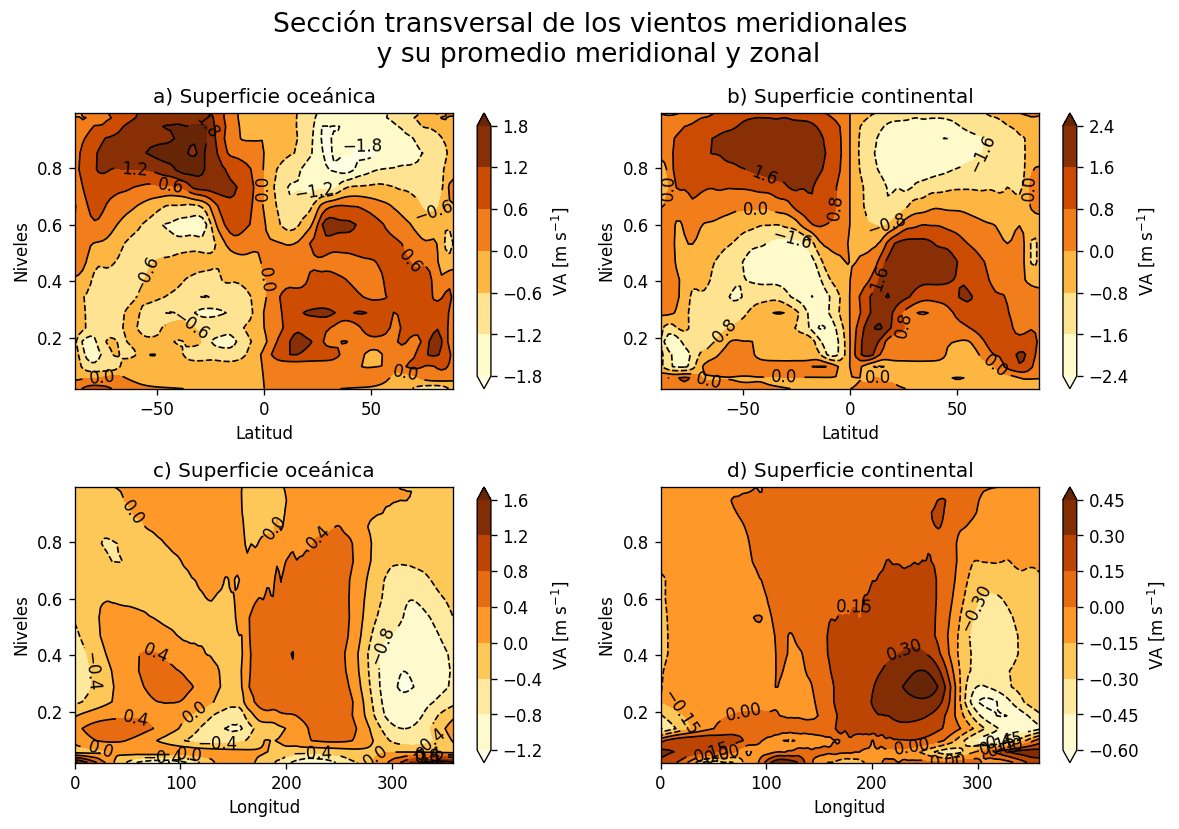

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10,7), dpi=120)

fig.suptitle('Sección transversal de los vientos meridionales \n y su promedio meridional y zonal', fontsize=16)

ax = axs[0, 0]
contour = ax.contourf(x, y, z, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x, y, z,colors='k', linewidths=1) 
ax.clabel(cc)
cbar.set_label('VA [m s$^{-1}$]')
ax.set_title('a) Superficie oceánica')
ax.set_xlabel('Latitud')
ax.set_ylabel('Niveles')

ax = axs[0, 1]
contour = ax.contourf(x1, y1, z1, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x1, y1, z1,colors='k', linewidths=1)
ax.clabel(cc)
cbar.set_label('VA [m s$^{-1}$]')
ax.set_title('b) Superficie continental')
ax.set_xlabel('Latitud')
ax.set_ylabel('Niveles')

ax = axs[1,0]
contour = ax.contourf(x2, y2, z2, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x2, y2, z2,colors='k', linewidths=1)
ax.clabel(cc)
cbar.set_label('VA [m s$^{-1}$]')
ax.set_title('c) Superficie oceánica')
ax.set_xlabel('Longitud')
ax.set_ylabel('Niveles')

ax = axs[1,1]
contour = ax.contourf(x3, y3, z3, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x3, y3, z3,colors='k', linewidths=1)
ax.clabel(cc)
cbar.set_label('VA [m s$^{-1}$]')
ax.set_title('d) Superficie continental')
ax.set_xlabel('Longitud')
ax.set_ylabel('Niveles')

plt.tight_layout()
fig.savefig('Trans_Zonal.png')
plt.show()

In [30]:
#Falta hacerlo con el índice eastward, es decir, promedios meridionales
UA_SO = ua1.mean(['time', 'lon'])
lat1_SO=UA_SO.lat
lev1_SO=UA_SO.lev

UA_SC = ua2.mean(['time', 'lon'])
lat1_SC=UA_SC.lat
lev1_SC=UA_SC.lev

In [31]:
x4, y4 = np.meshgrid(lat1_SO, lev1_SO)
print(x4.shape, y4.shape, lat1_SO.shape, lev1_SO.shape)
z4 = UA_SO
print(z4.shape)

x5, y5 = np.meshgrid(lat1_SC, lev1_SC)
print(x5.shape, y5.shape, lat1_SC.shape, lev1_SC.shape)
z5 = UA_SC
print(z5.shape)

(20, 96) (20, 96) (96,) (20,)
(20, 96)
(20, 96) (20, 96) (96,) (20,)
(20, 96)


In [32]:
prom_SO2 = ua1.mean(['time', 'lat'])
lon1_SO=prom_SO2.lon
lev1_SO=prom_SO2.lev

prom_SC2 = ua2.mean(['time', 'lat'])
lon2o=prom_SC2.lon
lev2o=prom_SC2.lev

In [33]:
x6, y6 = np.meshgrid(lon1_SO, lev1_SO)
print(x6.shape, y6.shape, lon1_SO.shape, lev1_SO.shape)
z6 = prom_SO2
print(z6.shape)

x7, y7 = np.meshgrid(lon2o, lev2o)
print(x7.shape, y7.shape, lon2o.shape, lev2o.shape)
z7 = prom_SC2
print(z7.shape)

(20, 192) (20, 192) (192,) (20,)
(20, 192)
(20, 192) (20, 192) (192,) (20,)
(20, 192)


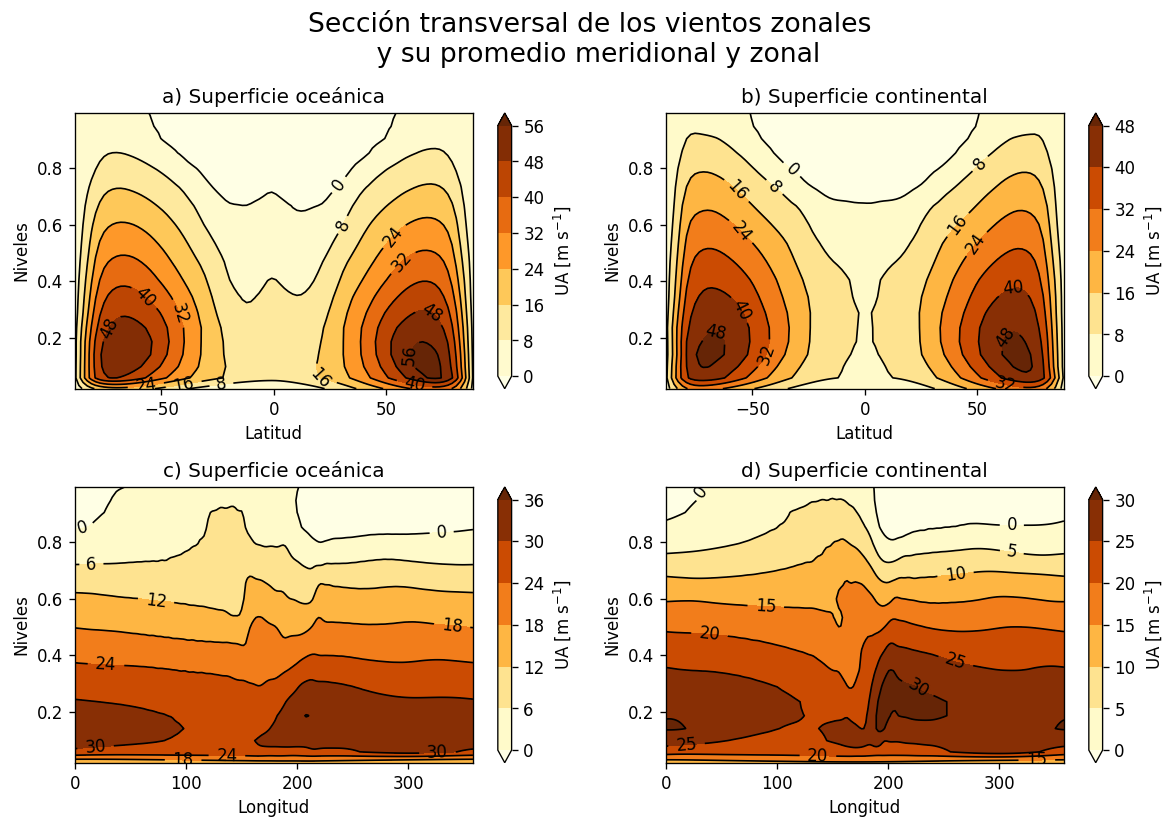

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10,7), dpi=120)

fig.suptitle('Sección transversal de los vientos zonales \n y su promedio meridional y zonal', fontsize=16)

ax = axs[0, 0]
contour = ax.contourf(x4, y4, z4, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x4, y4, z4,colors='k', linewidths=1) 
ax.clabel(cc)
cbar.set_label('UA [m s$^{-1}$]')
ax.set_title('a) Superficie oceánica')
ax.set_xlabel('Latitud')
ax.set_ylabel('Niveles')

ax = axs[0, 1]
contour = ax.contourf(x5, y5, z5, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x5, y5, z5,colors='k', linewidths=1)
ax.clabel(cc)
cbar.set_label('UA [m s$^{-1}$]')
ax.set_title('b) Superficie continental')
ax.set_xlabel('Latitud')
ax.set_ylabel('Niveles')

ax = axs[1,0]
contour = ax.contourf(x6, y6, z6, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x6, y6, z6,colors='k', linewidths=1)
ax.clabel(cc)
cbar.set_label('UA [m s$^{-1}$]')
ax.set_title('c) Superficie oceánica')
ax.set_xlabel('Longitud')
ax.set_ylabel('Niveles')

ax = axs[1,1]
contour = ax.contourf(x7, y7, z7, cmap='YlOrBr', extend='both')
cbar = fig.colorbar(contour, ax=ax)
cc=ax.contour(x7, y7, z7,colors='k', linewidths=1)
ax.clabel(cc)
cbar.set_label('UA [m s$^{-1}$]')
ax.set_title('d) Superficie continental')
ax.set_xlabel('Longitud')
ax.set_ylabel('Niveles')

plt.tight_layout()
fig.savefig('Trans_meridional.png')
plt.show()

### Mapa global de temperatura

In [35]:
prom_SO_temp=ts1.mean('time')
lats_temp_SO=ts1.lat
lons_temp_SO=ts1.lon

prom_SC_temp=ts2.mean('time')
lats_temp_SC=ts2.lat
lons_temp_SC=ts2.lon

In [36]:
#quitamos la línea blanca
data_temp_SO, lon1 = add_cyclic_point(prom_SO_temp, coord=lons_temp_SO)
data_temp_SC, lon2 = add_cyclic_point(prom_SC_temp, coord=lons_temp_SC)

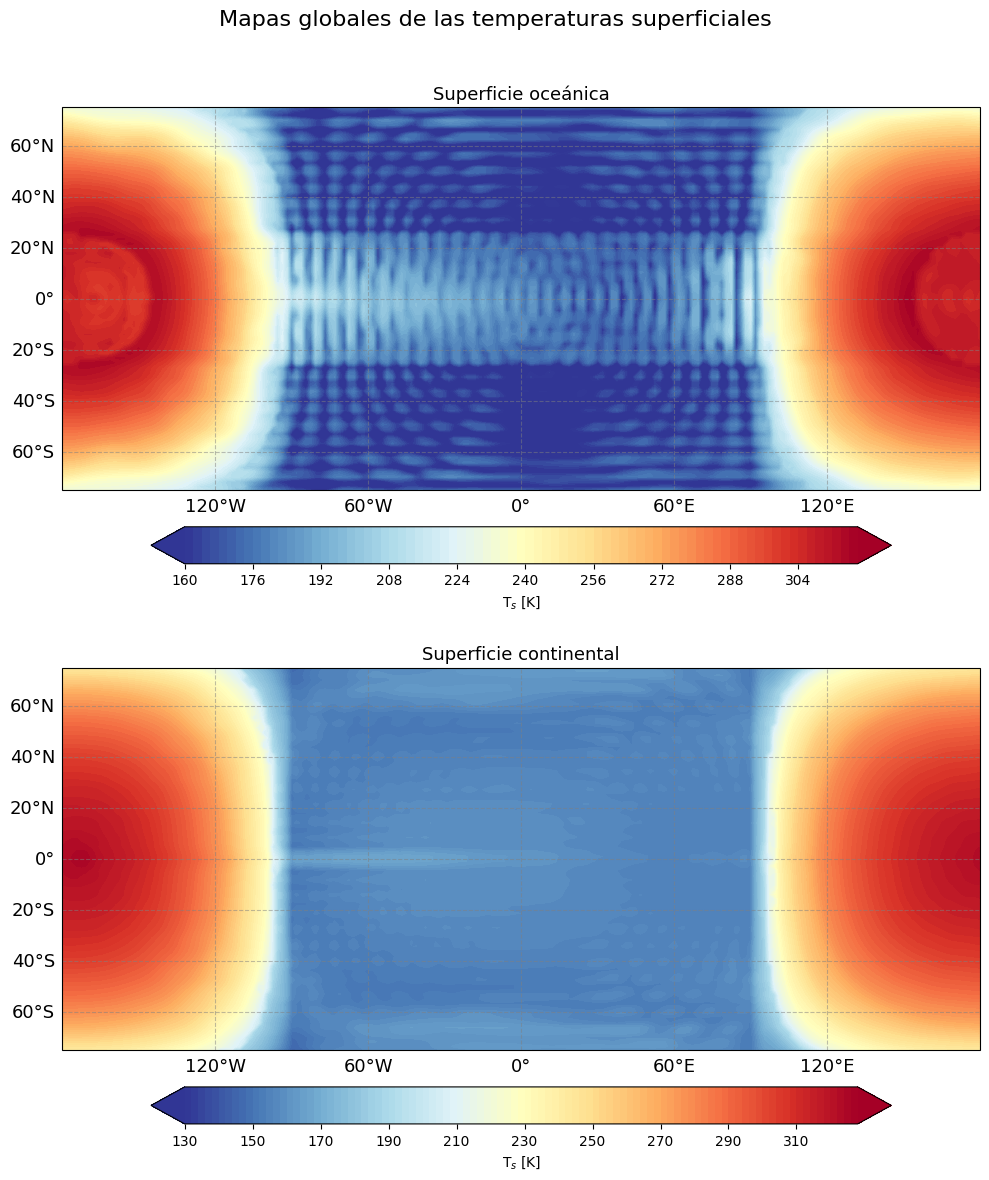

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})

fig.suptitle('Mapas globales de las temperaturas superficiales', fontsize=16)

# Primer gráfico
ax = axs[0]
cs=ax.contourf(lon1,lats_temp_SO,data_temp_SO, levels = np.arange(160, 320, 2), cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Superficie oceánica',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('T$_s$ [K]')

# Segundo gráfico
ax = axs[1]
cs=ax.contourf(lon2,lats_temp_SC,data_temp_SC, levels = np.arange(130, 330, 2), cmap='RdYlBu_r',extend='both',transform=ccrs.PlateCarree())
ax.set_extent([0, 359.1, -75, 75], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax.set_title('Superficie continental',fontsize=13)
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.07, pad=0.07)
cbar.ax.set_xlabel('T$_s$ [K]')

plt.tight_layout(h_pad=0.09)
fig.savefig('Temperaturas.png')
plt.show()

In [38]:
#aquí va mi intento de ponderar:(
#Debemos ponderar nuestros datos 
lats_SO=va1.lat

weights_SO = np.cos(np.deg2rad(lats_SO))
weights_SO.name = "weights_SO"

#Agregamos los pesos a un nuevo objeto de xarray 
va1_weighted = va1.weighted(weights_SO)
va1_new=va1_weighted.mean('lat')
va1_weighted

DataArrayWeighted with weights along dimensions: lat

In [39]:
prom_pond = va1_new.mean(['time', 'lev'])
lon_pond=prom_pond.lon
lev_pond=va1_new.lev

In [40]:
x_pond, y_pond = np.meshgrid(lon_pond, lev_pond)
print(x_pond.shape, y_pond.shape, lon_pond.shape, lev_pond.shape)
z_pond = prom_pond #he aquí el problema, z es de 1D mientras que X y Y son de 2D, por lo que no se pueden graficar:(
print(z_pond.shape)

(20, 192) (20, 192) (192,) (20,)
(192,)
